In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('hour.csv')

In [44]:
# PREPROCESSING

# Removing useless attributes
df = df.drop('dteday', axis=1)
df = df.drop('instant', axis=1)
df = df.drop('yr', axis=1)

# Applying sqrt to "cnt" (to make it a continuous variable)
df['cnt'] = np.sqrt(df['cnt'])

# Removing deprecated attributes after the sqrt transformation (cnt = casual + registered)
df = df.drop('casual', axis=1)
df = df.drop('registered', axis=1)

df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24000,0.28790,0.81000,0.00000,4.00000
1,1,1,1,0,6,0,1,0.22000,0.27270,0.80000,0.00000,6.32456
2,1,1,2,0,6,0,1,0.22000,0.27270,0.80000,0.00000,5.65685
3,1,1,3,0,6,0,1,0.24000,0.28790,0.75000,0.00000,3.60555
4,1,1,4,0,6,0,1,0.24000,0.28790,0.75000,0.00000,1.00000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   mnth        17379 non-null  int64  
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 1.6 MB


In [56]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe().drop('count')
# to save the image do a screenshot

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
mean,2.50164,6.53778,11.54675,0.02877,3.00368,0.68272,1.42528,0.49699,0.47578,0.62723,0.19010,12.01585
std,1.10692,3.43878,6.91441,0.16717,2.00577,0.46543,0.63936,0.19256,0.17185,0.19293,0.12234,6.71454
min,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.02000,0.00000,0.00000,0.00000,1.00000
25%,2.00000,4.00000,6.00000,0.00000,1.00000,0.00000,1.00000,0.34000,0.33330,0.48000,0.10450,6.32456
50%,3.00000,7.00000,12.00000,0.00000,3.00000,1.00000,1.00000,0.50000,0.48480,0.63000,0.19400,11.91638
75%,3.00000,10.00000,18.00000,0.00000,5.00000,1.00000,2.00000,0.66000,0.62120,0.78000,0.25370,16.76305
max,4.00000,12.00000,23.00000,1.00000,6.00000,1.00000,4.00000,1.00000,1.00000,1.00000,0.85070,31.25700


In [59]:
# Format data like exercises

X = df.values
N, M = X.shape
attributeNames = df.columns.tolist()

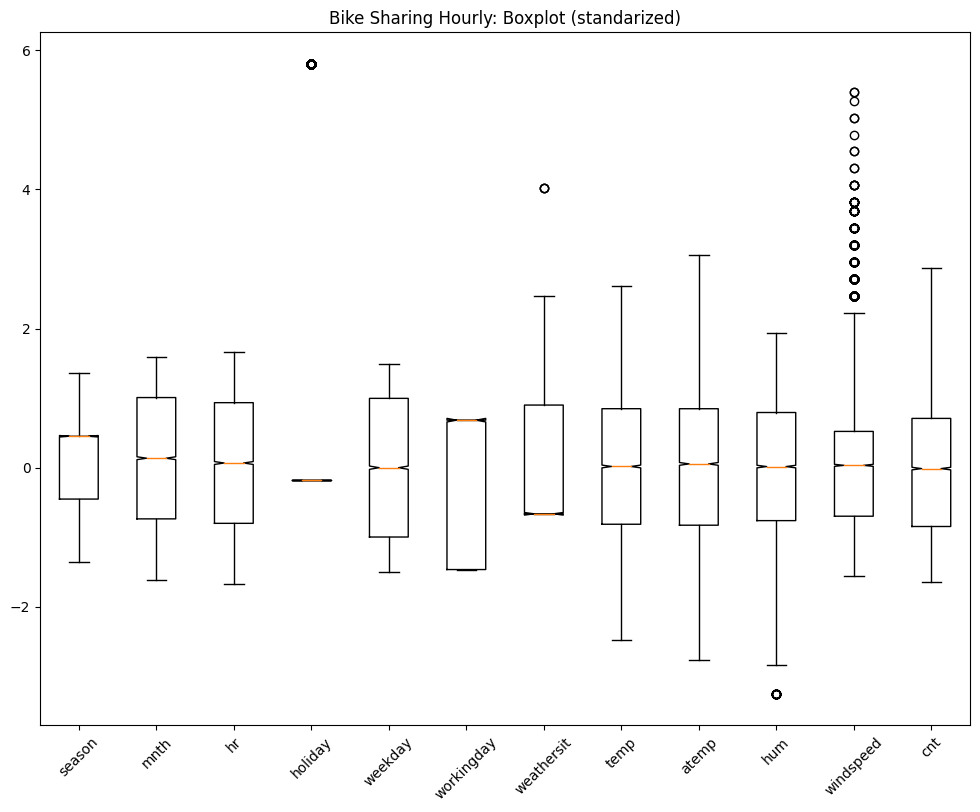

In [58]:
from matplotlib.pyplot import (figure, title, boxplot, xticks, subplot, hist,
                               xlabel, ylim, yticks, show, savefig)
import numpy as np
from scipy.io import loadmat
from scipy.stats import zscore

# standardize and plot to look for outliers
figure(figsize=(12,9))
title('Bike Sharing Hourly: Boxplot (standarized)')
boxplot(zscore(X, ddof=1), attributeNames)
xticks(range(1,M+1), attributeNames, rotation=45)
savefig('./res/plots/boxplot_standardized.png')

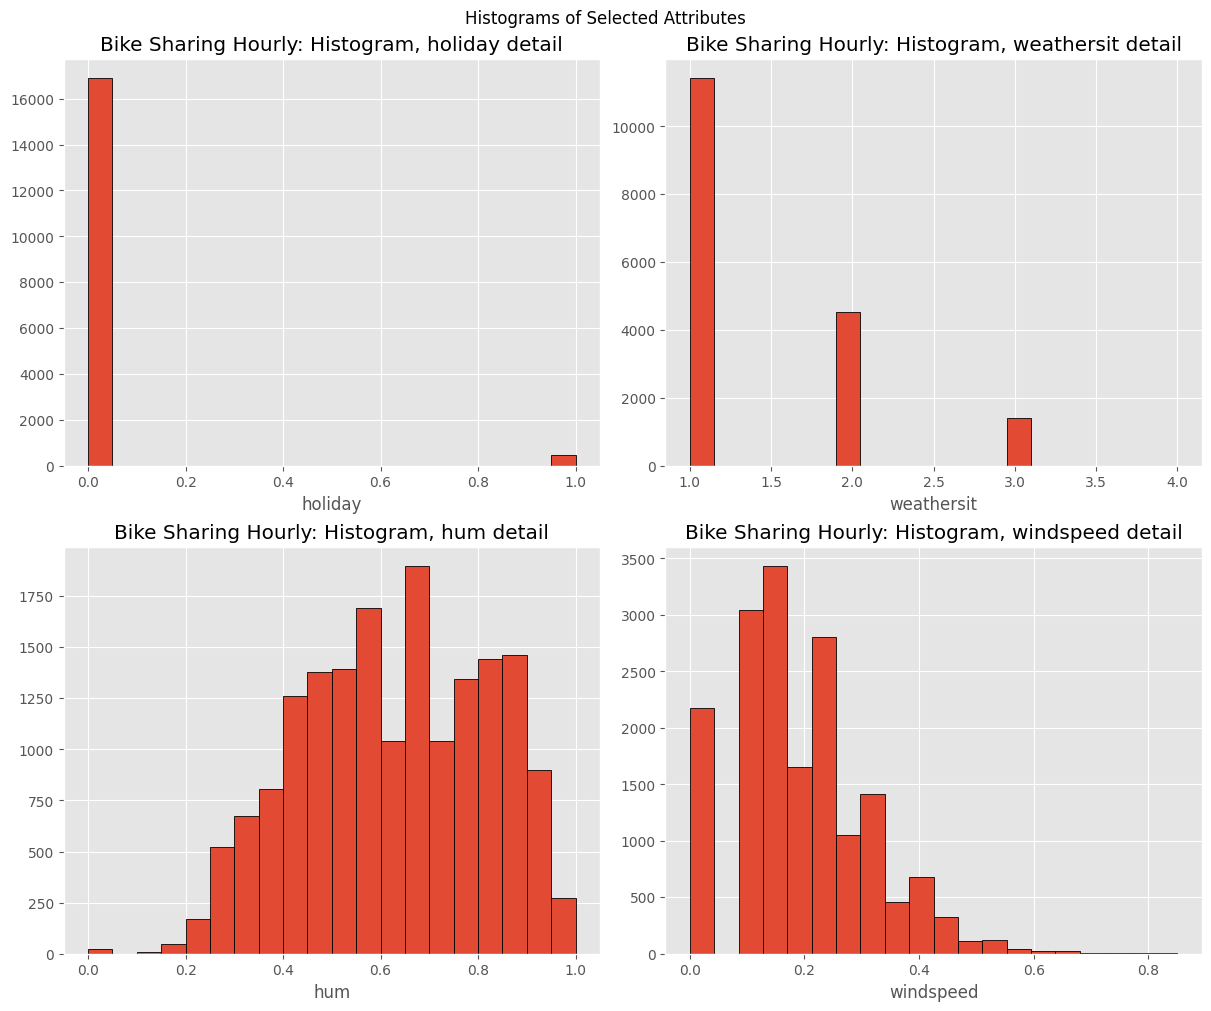

In [78]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Use a specific style sheet for the plot
plt.style.use('ggplot')

# Assuming you have attributeNames defined as a list
attribute_indices = [3, 6, 9, 10]
attributes_to_plot = [attributeNames[i] for i in attribute_indices]

# Create a figure and grid for the subplots
fig = plt.figure(figsize=(12, 10), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

# Create subplots with adjusted sizes
axes = [fig.add_subplot(gs[i//2, i%2]) for i in range(4)]

# Iterate over the attributes and plot histograms with borders
for i, attribute_index in enumerate(attribute_indices):
    ax = axes[i]
    ax.hist(X[:, attribute_index], bins=20, edgecolor='black', linewidth=0.6)
    ax.set_xlabel(attributeNames[attribute_index])
    ax.set_title(f'Bike Sharing Hourly: Histogram, {attributeNames[attribute_index]} detail')

# Add super title
fig.suptitle('Histograms of Selected Attributes')

# Save the plot
plt.savefig('./res/plots/hist_multiple_attributes.png')
plt.show()


Theoretical mean:  0
Theoretical std.dev.:  2
Empirical mean:  0.04135897020211849
Empirical std.dev.:  2.035627813386752


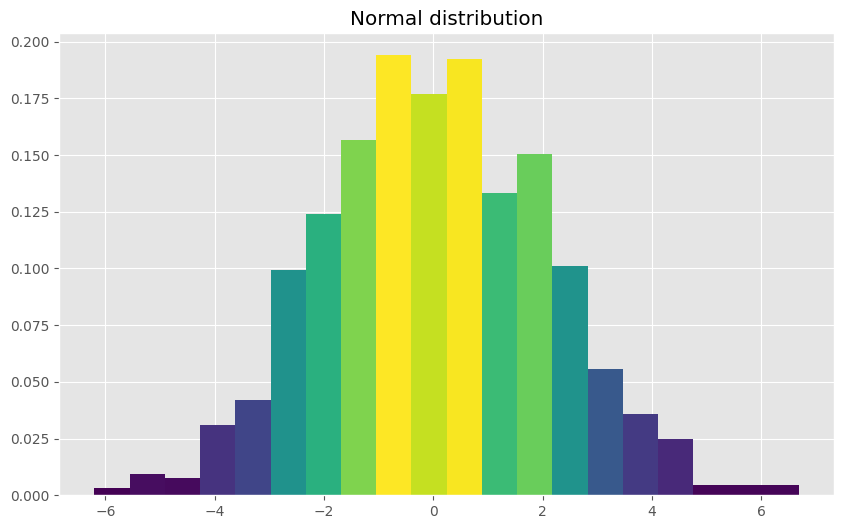

In [80]:
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt

# Check for normal distribution
# Number of samples
N_test = 1000
# Mean
mu = 0
# Standard deviation
s = 2
# Number of bins in histogram
nbins = 20

# Generate samples from the Normal distribution
X_test = np.random.normal(mu,s,N_test).T 

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Normal distribution')

# Plot the histogram with gradient color
N, bins, patches = ax.hist(X_test, bins=nbins, density=True)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()
# We need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Loop through the objects (patches) and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

mu_ = X_test.mean()
s_ = X_test.std(ddof=1)

print("Theoretical mean: ", mu)
print("Theoretical std.dev.: ", s)
print("Empirical mean: ", mu_)
print("Empirical std.dev.: ", s_)

plt.savefig('./res/plots/normal_distribution.png')
plt.show()


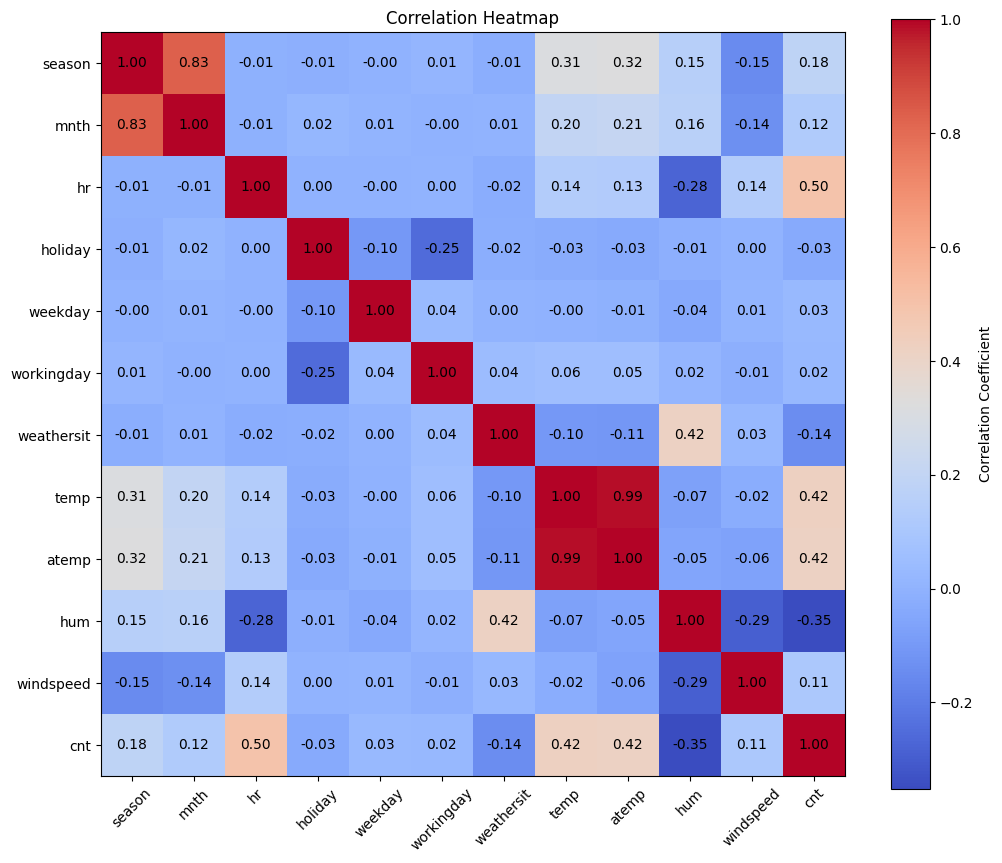

In [67]:
# Assuming you have the correlation matrix calculated
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

plt.colorbar(heatmap, label='Correlation Coefficient')

# Add numerical values in the squares
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', fontsize=10)

plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig('./res/plots/correlation_heatmap.png')

# Show the plot
plt.show()


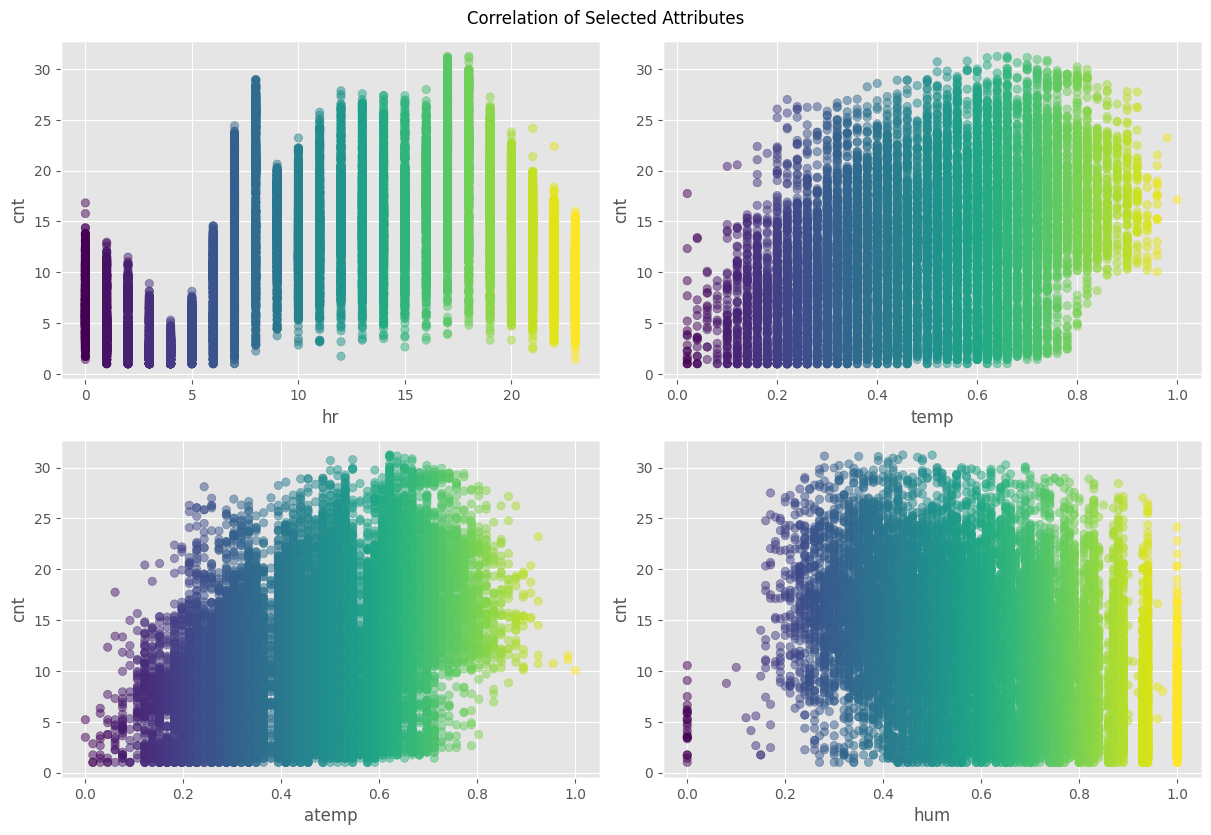

In [111]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Use a specific style sheet for the plot
plt.style.use('ggplot')

# Get the list of column names (variables)
variables = df.columns

interesting_vars = [2, 7, 8, 9]
# Calculate the number of interesting variables
num_interesting_vars = len(interesting_vars)

# Create a figure and grid for the subplots
fig = plt.figure(figsize=(12, 15), constrained_layout=True)
gs = fig.add_gridspec(4, num_interesting_vars//2)

# Create subplots with adjusted sizes
axes = [fig.add_subplot(gs[i//2, i%2]) for i in range(num_interesting_vars)]

# Plot the interesting variables against the last feature
for i in range(num_interesting_vars):
    ax1 = axes[i]
    ax2 = ax1.twiny()  # Create a twin x-axis
    scatter = ax1.scatter(df.iloc[:, interesting_vars[i]], df.iloc[:, -1], alpha=0.5, marker='o', c=df.iloc[:, interesting_vars[i]], cmap='viridis')
    
    # Set labels for the x and y axes
    ax1.set_xlabel(df.columns[interesting_vars[i]])
    ax1.set_ylabel(df.columns[-1])
    
    # Hide the secondary x-axis
    ax2.get_xaxis().set_visible(False)
    
    # Add a grid to the plot
    ax1.grid(True)

# Add super title
fig.suptitle('Correlation of Selected Attributes')

# Save the plot
plt.savefig('./res/plots/correlation.png')
plt.show()


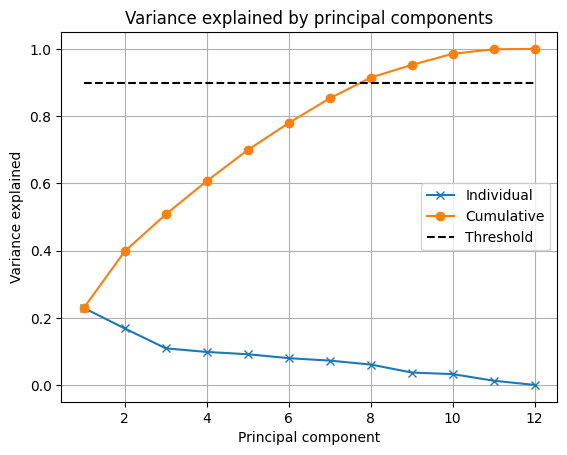

In [70]:
from scipy.linalg import svd
from scipy.stats import tstd

# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(axis=0)
Y = Y/tstd(X) # standardize to variance one (this is not necessary, but makes it easier to inspect the principal components)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.90

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.savefig('./res/plots/variance_explained.png')
plt.show()

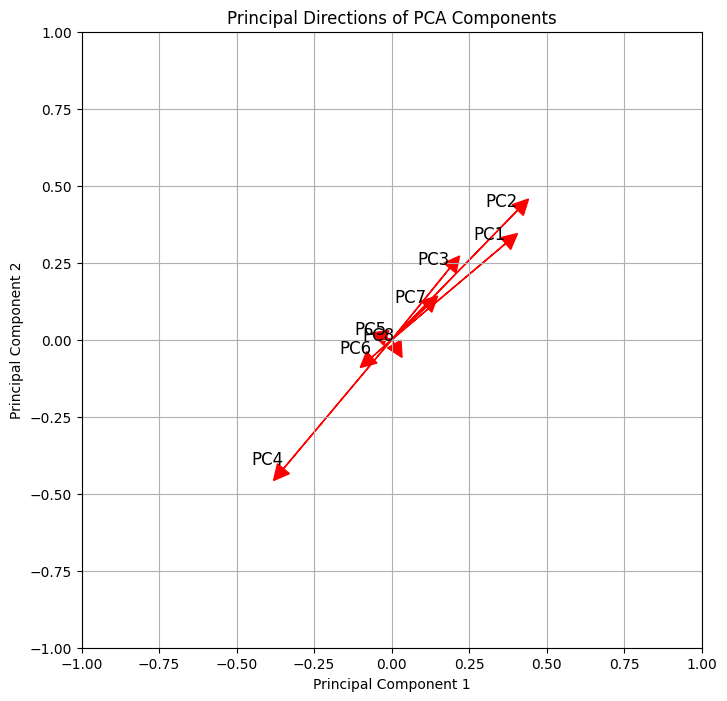

In [75]:
# Plot the principal directions of the PCA components
plt.figure(figsize=(8, 8))

# Number of principal components to display
num_components_to_plot = 8  

for i in range(num_components_to_plot):
    plt.arrow(0, 0, V[i, 0], V[i, 1], head_width=0.05, head_length=0.05, fc='r', ec='r')
    plt.text(V[i, 0], V[i, 1], f'PC{i+1}', fontsize=12, ha='right', va='bottom')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Directions of PCA Components')
plt.grid()
plt.savefig('./res/plots/pca_components.png')
plt.show()

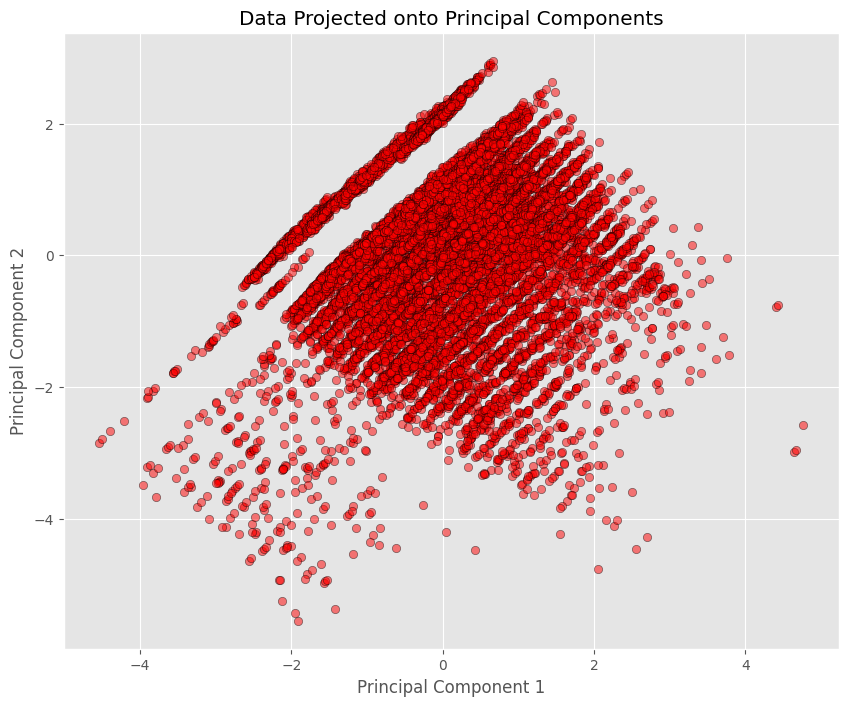

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of principal components to use in the projection
num_components_to_plot = 2

# Project the centered data onto principal component space
projected_data = np.dot(Y, V[:, :num_components_to_plot])

# Create a new DataFrame with the projected data
projected_df = pd.DataFrame(data=projected_data, columns=[f'PC{i+1}' for i in range(num_components_to_plot)])

# Visualize the projected data
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')  # Use a specific style sheet for the plot
scatter = plt.scatter(projected_df['PC1'], projected_df['PC2'], alpha=0.5, c='r', edgecolors='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Projected onto Principal Components')
plt.grid(True)
# plt.colorbar(scatter)  # Add a colorbar to the scatter plot
plt.savefig('./res/plots/pca_projected.png')
plt.show()
